In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


# **1. First examination of data**

Let's load the data and examine it.

In [2]:
df = pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
df.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100k_pop', 'country_year', 'HDI_for_year',
       'gdp_for_year','gdp_per_capita', 'generation']

In [5]:
#gdp_for_year is a string column, we should fix it
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df["age"] = df["age"].str.replace("5-14 years","05-14 years")

In [6]:
df.isnull().sum() #we have 19456 missing values in a 'HDI for year' column

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides_100k_pop        0
country_year             0
HDI_for_year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

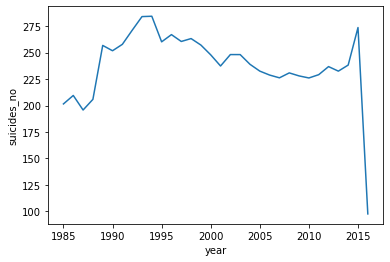

In [7]:
sns.lineplot(df.year, df.suicides_no, ci = None) #to see general trend

The general trend shows that there was a huge jump in number of suicides around 1990 and it continued till 1995, then there was a slow decrasing till 2010 with a new increasing after it and peak in 2015. Let's have a look at gender and age distribution of suicides respectively. 

# **2. Gender and suicide rates**

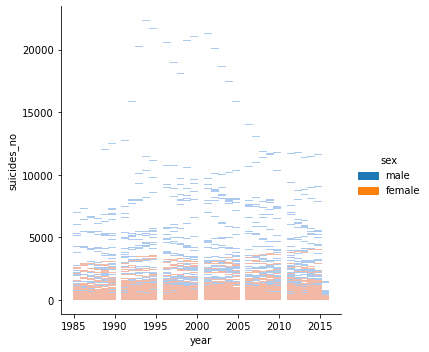

In [8]:
sns.displot(df, x="year", y='suicides_no', hue="sex")

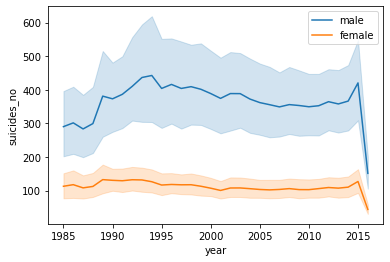

In [9]:
df_men = df.query("sex=='male'")
df_women = df.query("sex=='female'")
sns.lineplot(data=df_men, x="year", y="suicides_no")
sns.lineplot(data=df_women, x="year", y="suicides_no")
plt.legend(["male", 'female'])

So, generally men tend to commit suicide more often than women. And there is a peak in 2015 for both of them. Also, there were less suicides before 1990 for men and the line is roughly straight for women.
There are two ways to look at suicides with respect to age - to look at absolute numbers and proportions of suicides in every age group (with respect to the total population in that age group). Let's do both.

# **3. Age**

<AxesSubplot:xlabel='year', ylabel='suicides_no'>

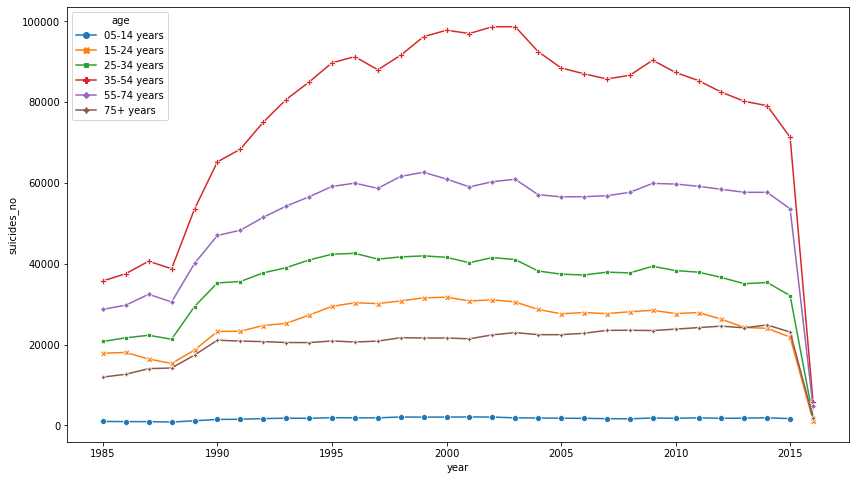

In [10]:
#absolute number of suicide in different age groups
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_age.reset_index(inplace=True)
plt.figure(figsize=(14,8))
sns.lineplot(data = df_age,x="year",y= df_age.suicides_no, hue = "age",
            style = "age", markers=True, dashes=False)

<AxesSubplot:xlabel='year'>

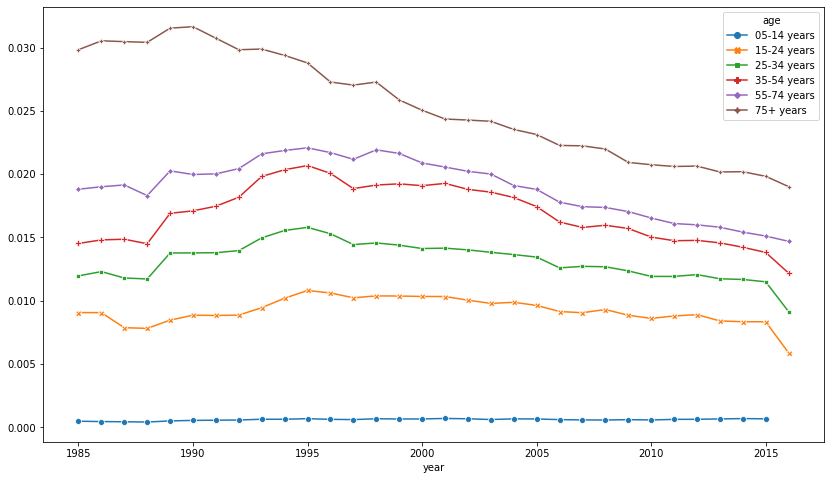

In [11]:
#proportion of suicide in the different age populations
plt.figure(figsize=(14,8))
sns.lineplot(data = df_age,x="year",y= df_age.suicides_no*100/df_age.population, hue = "age",
            style = "age", markers=True, dashes=False)

**5-14.** 
Both graphs show that 5-14 years old kids almost do not kill themselves.

**15-24.**
The first graph shows that absolute numbers are higher than for 75+ group, while the proportion shows this group is the next smallest suicide category after 5-14 group. Both graphs demonstrate tendency to decreasing of suicide numbers in this category.

**25-34.**
A bit bigger numbers than for the previous category are shown on both graphs with general tendency todecreaing. 

**35-54.**
This looks very interesting as this category takes 20 years period, not 10 years as previous ones. And it is not surprising that absolute numbers are much bigger. What is surprising - the dramatic increasing of those numbers in 1990-2004 years period. The second graph shows increasing in 1988-1995 then it starts to decrease slowly. It also compensates huge absolute numbers - the propotion of suicides in this age group is not the highest one as absolute numbers on the first graph are.

**55-74.**
Absolute numbers are a bit higher than in 25-34 category, while the proportion shows this is the second highest category after 75+ group

**75+**
The next high line on the first graph is 75+ category, there was an increasing of suicide number starting in 1988 and ending in 1990. After this year the number is around 20000 and doesn't tend to decrease.  From the other hand, the population of this age group is increasing generally and the proportion of suicides is strongly decreasing because of that (since 1990). Nevertheless, in matter of proportions this age category proportion is still the highest one.

General tendency of suicide rates shows increasing around 1988 and decreasing after 1995 year. 

Now let's have a look at age and gender distribution of suiciders using barplots.

<AxesSubplot:xlabel='sex', ylabel='suicides_no'>

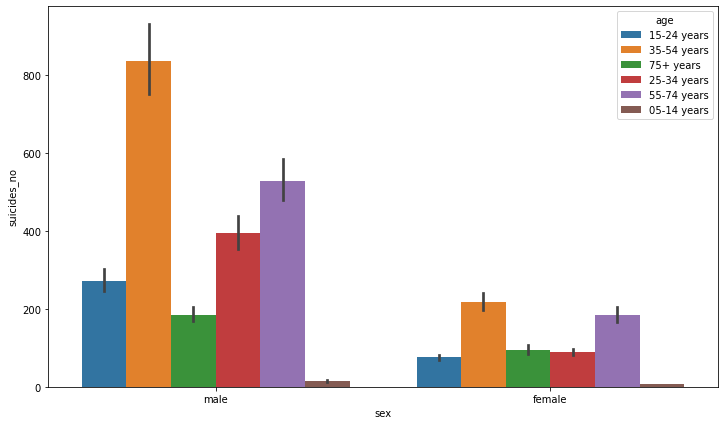

In [12]:
plt.figure(figsize=(12,7))
sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',data = df)

The data has a column called 'suicides_100k_pop', the graph below shows the clear tendency of growth of suicide numbers per 100k population. We can conclude that age correlates with suicide - the older a person is - the higher chance to commit a suicide.

<AxesSubplot:xlabel='year', ylabel='suicides_100k_pop'>

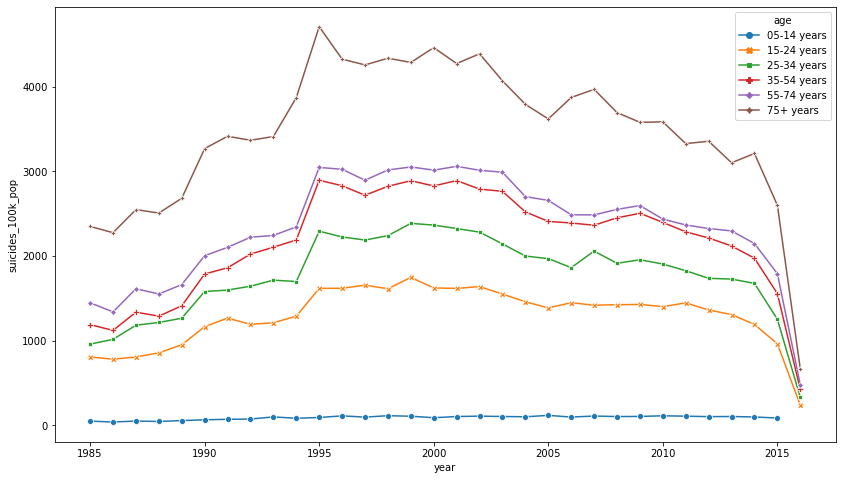

In [13]:
df_age = df.groupby(["year","age"])["suicides_no",'suicides_100k_pop'].sum()
df_age.reset_index(inplace=True)
plt.figure(figsize=(14,8))
sns.lineplot(data = df_age,x="year",y= df_age.suicides_100k_pop, hue = "age",
            style = "age", markers=True, dashes=False)

# **4. What about generations?**

<AxesSubplot:xlabel='year', ylabel='suicides_100k_pop'>

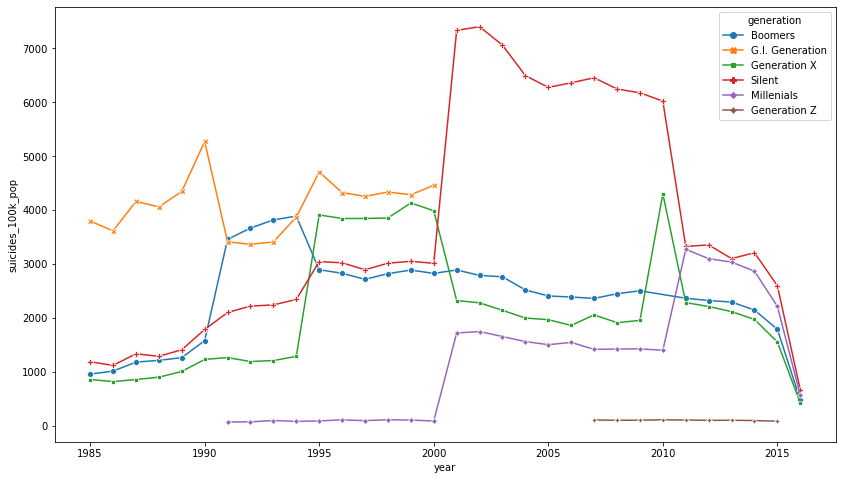

In [14]:
df_gen = df.groupby(["year","generation"])["suicides_no", 'suicides_100k_pop'].sum()
df_gen.reset_index(inplace=True)
plt.figure(figsize=(14,8))
sns.lineplot(data = df_gen,x="year",y= df_gen.suicides_100k_pop, hue = "generation",
            style = "generation", markers=True, dashes=False)

Generation G.I. is a generation that in 1985 was in category 75+, so it's not surprising that the line ends at year 2000. There were not a lot of these old people and suicide rate was the highest, especially it increased in 1990.

Silent people were 35-54 years old in 1985. As their age between 1988 and 2000 was increasing, they tended to commit suicide more often, but in 2000 something happened, we can see a huge jump of numbers and a big decreasing of them in ~2011.

Boomers (25-34 years old in 1985) show a dramatic increasing between 1990 and 1995 with a slow decreasing after 1995.

Generation X (15-24 years old in 1985) were very young between 1985-1990, so the suicide rate is relatively low, but in 1995 we can see another jump. Looks like some historical disasters like wars or system changes coud influence during those years.

Millenials (15-24 in 2014) - while they were kids, the suicide rate was close to zero. When they were becoming teenagers and young adults, the rate was increasing. It could be because of bad surroundings, the Internet communities or wars in some sountries (we will have a look at countries later). Another reason - as they became adults and left their parents, the rapid change could lead to killing themselves. 

Generation Z (5-14 in 2014) are still kids in 2015, nevertheless they do commit some suicides, the line is roughly straight, the rate is a bit higher than 0.

# **5. Countries. General list.**

In [15]:
country_list = list(df['country'].unique())
country_suicide_ratio = []
for i in country_list:
    x = df[df["country"] == i]
    country_suicide_rate = sum(x.suicides_100k_pop)/len(x)
    country_suicide_ratio.append(country_suicide_rate)
country_suicide_ratio

suicides = pd.DataFrame({"country": country_list, "country_suicide_ratio": country_suicide_ratio})
suicides=suicides.sort_values(by="country_suicide_ratio", ascending=False)

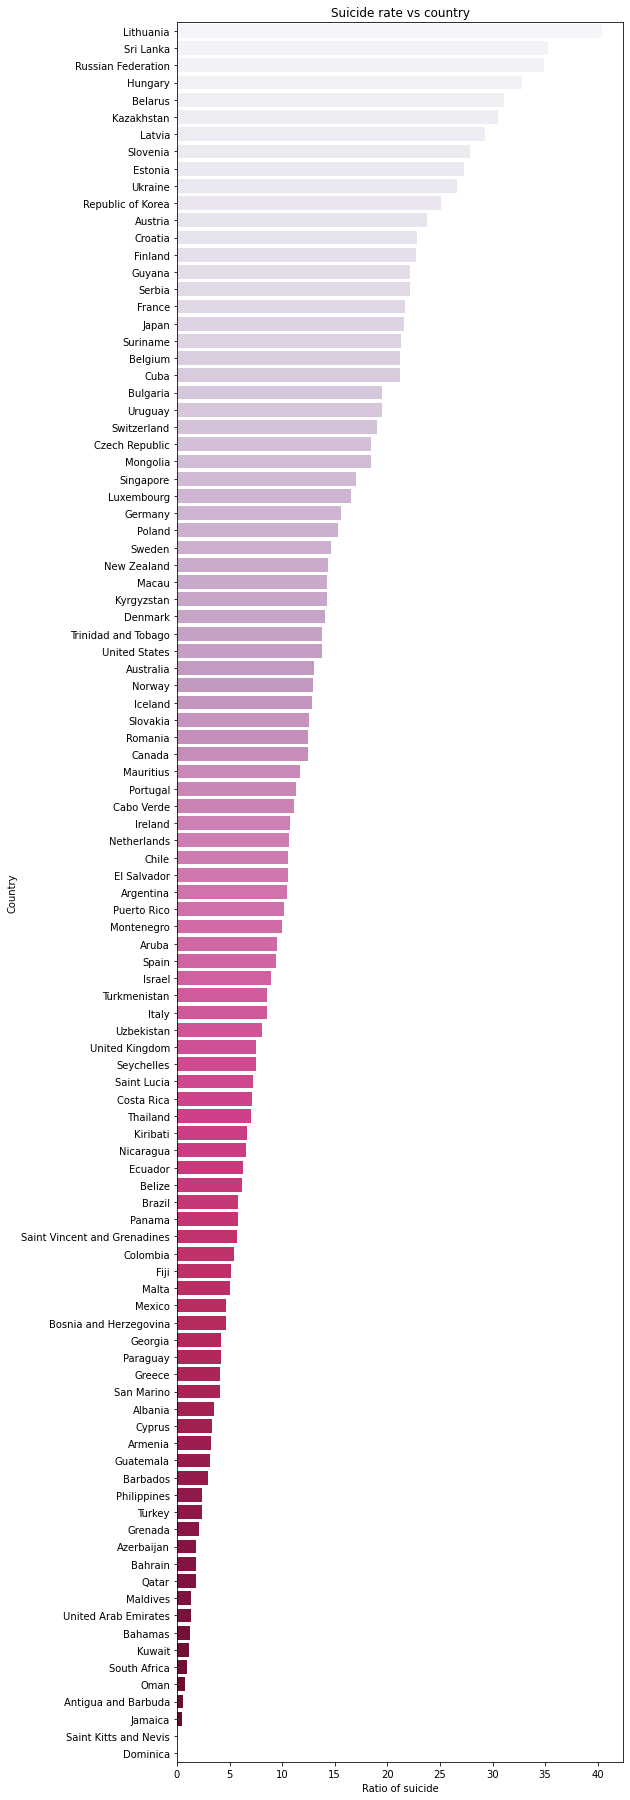

In [16]:
plt.figure(figsize=(8,32))
sns.barplot(x=suicides['country_suicide_ratio'], y=suicides['country'], palette="PuRd")
plt.xlabel("Ratio of suicide")
plt.ylabel("Country")
plt.title("Suicide rate vs country")
plt.show()

In [17]:
pip install ppscore

     |████████████████████████████████| 47 kB 369 kB/s eta 0:00:01
  Created wheel for ppscore: filename=ppscore-1.2.0-py2.py3-none-any.whl size=13050 sha256=0307e198cfe79f53c7d5fed99913b42544830ec68985f902f0f48cacbaea866d
  Stored in directory: /root/.cache/pip/wheels/d2/3c/58/2ff786414b21713edc6f4fdb54fdee89ac37bca5edd1f60634
Successfully built ppscore
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# **6. Predictive Power Score matrix**

So far we have seen the relationship between suicide numbers and age/gender/generation and made a list of countries according to the highest suicide ratio using suicide per 100k population feature. But what about statistics? What can Predictive Power Score matrix tell us about these and other relationships in our data? Let's find out.

<AxesSubplot:title={'center':'PPS matrix'}, xlabel='feature', ylabel='target'>

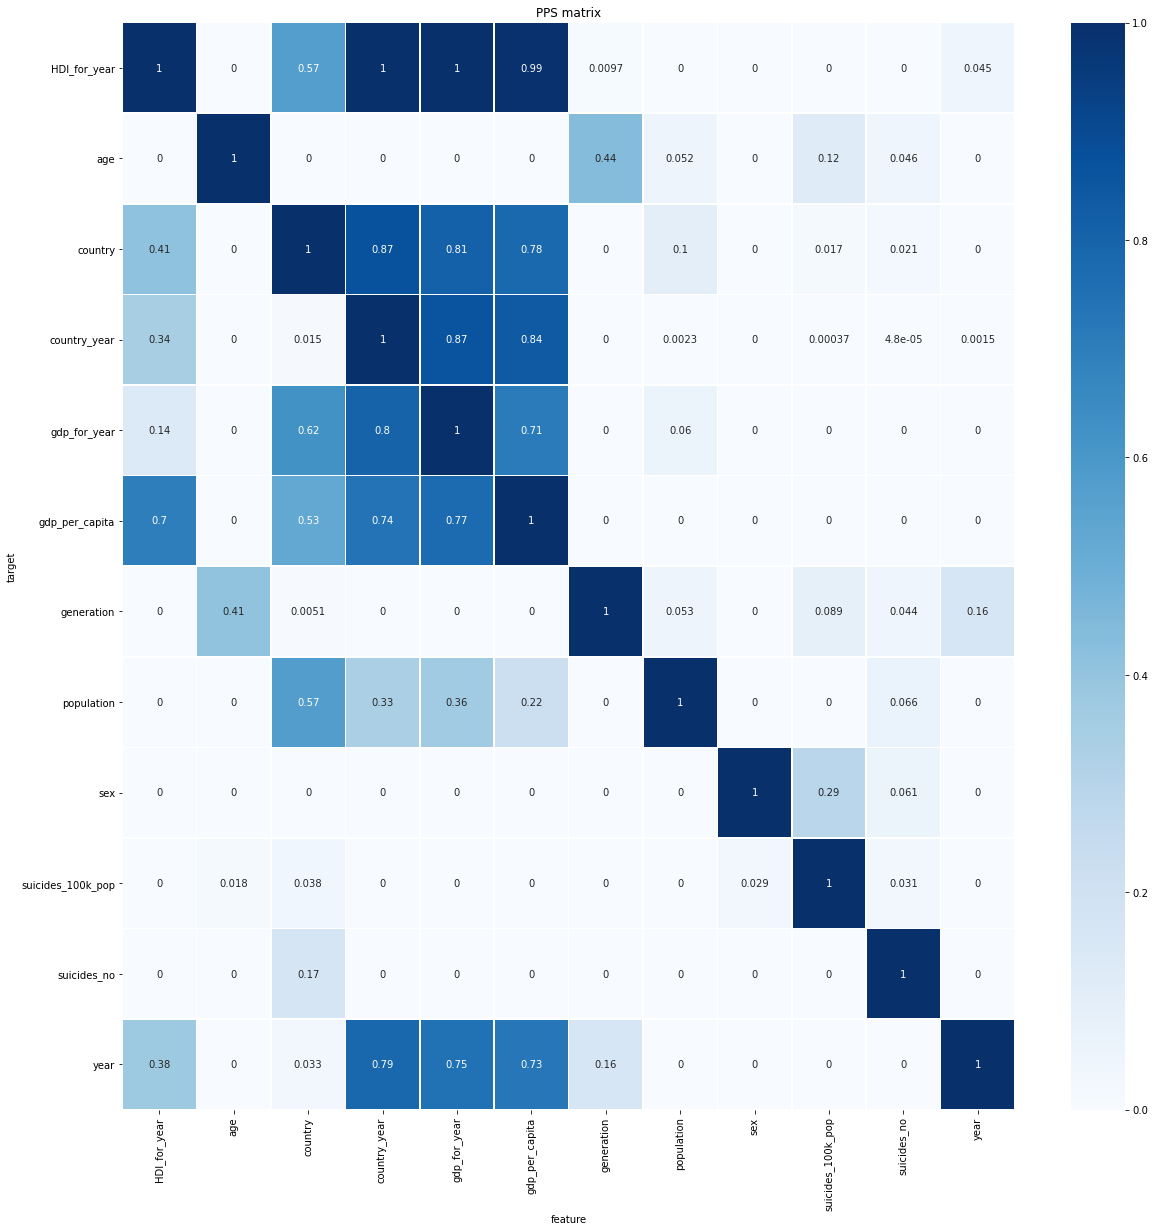

In [18]:
def heatmap(df):
    df = df[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
    fig, ax = plt.subplots(figsize=(20,20)) 
    ax = sns.heatmap(df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
    ax.set_title("PPS matrix")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    return ax

import ppscore as pps
matrix = pps.matrix(df)
heatmap(matrix)

Surprisingly, there is very weak correlation between age and suicides_100k_pop and even no correlation between age and suicides_no. And there is some correlation between country and suicides_no. Our hypothesis is that in different countries age distribution is very different as well as the reasons for people to do that are very different and don't have strong correlation with GDP per capita or HDI. We will check them next.

In [19]:
sorted_countries = suicides.country.tolist() #the list of countries in order according to the 
#mean of suicides numbers per country

# **7. Suicides per country per year and GDP per capita**

Time to examine top 20 suicide rate countries and their GDP per capita.

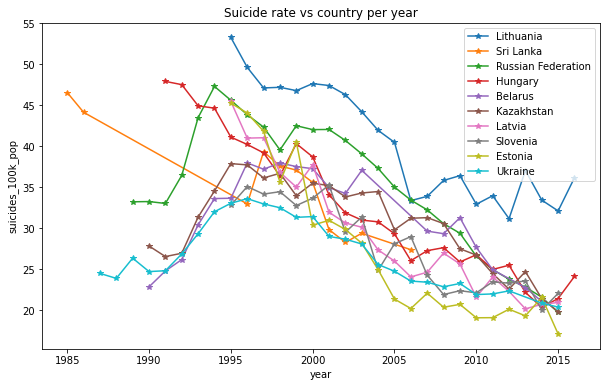

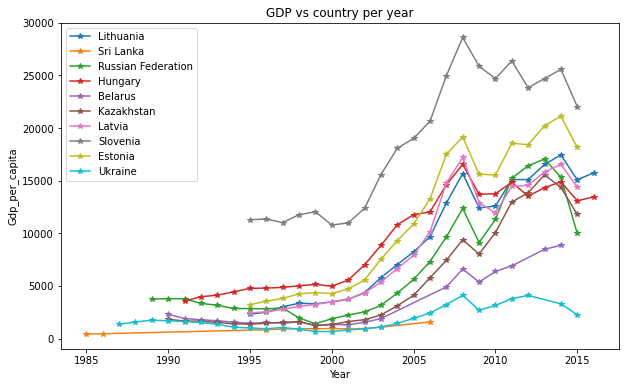

In [20]:
plt.figure(figsize = (10,6))
df_sui = df.groupby(["country","year"]).suicides_100k_pop.mean()
for country in sorted_countries[:10]:
    plt.plot(df_sui[country].index,df_sui[country].values, label=country, marker="*")
plt.xlabel("year")
plt.ylabel("suicides_100k_pop")
plt.title("Suicide rate vs country per year")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in sorted_countries[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("Gdp_per_capita")
plt.title("GDP vs country per year")
plt.legend()
plt.show()

Well, **Lithuania** is an example of pretty high correlation between GDP and suicide rate. But what about others?

**Sri Lanka** demonstrates decreasing of suicide rate and almost no change in GDP per capita. The next important moment is that we don't have the data for all years, and this is not the only case of lack of data in this dataset.

**Russian Federation, Hungary, Belarus, Latvia, Kazakhstan, Slovenia and Estonia** have high correlation between GDP and suicide rate - with the GDP growing suicide rate is going down. That could be the case or could be not. If we look carefully at them we can recognise that all of them except Hungary are former Soviet Union participants and increasing suicide rates after collapse of the system was expected. When these countries started to find their own ways and build new societies, their GDP started to grow as well and suicide level started to decrease while people had more hope for bright future. What about **Ukraine**? There was a decreasng of suicide rate much earlier than country started to increase its GDP per capita and we can't say this growth looks impressive or correlating with suicide numbers. It's interesting that Slovenia whose GDP is the highest on this graph has higher suicide rate than Ukraine whose GDP is the lowest one among post SU countries.

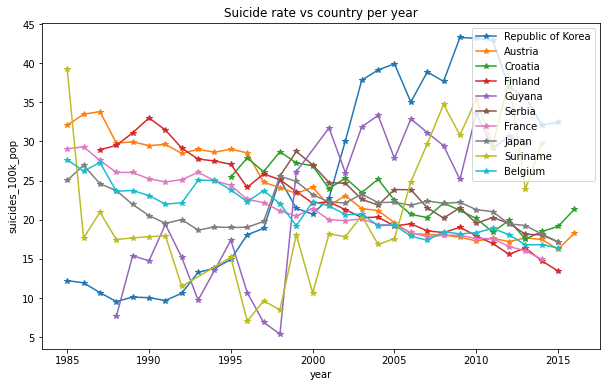

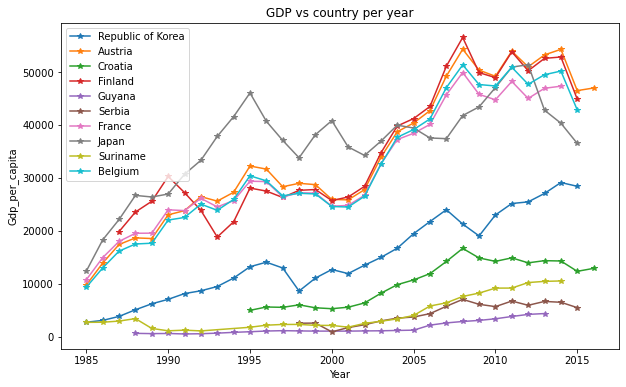

In [21]:
plt.figure(figsize = (10,6))
df_sui = df.groupby(["country","year"]).suicides_100k_pop.mean()
for country in sorted_countries[10:20]:
    plt.plot(df_sui[country].index,df_sui[country].values, label=country, marker="*")
plt.xlabel("year")
plt.ylabel("suicides_100k_pop")
plt.title("Suicide rate vs country per year")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in sorted_countries[10:20]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("Gdp_per_capita")
plt.title("GDP vs country per year")
plt.legend()
plt.show()

Here we can see that European countries like Austria, Croatia, Finland, France and Belgium are demonstrating huge growth of GDP, while not so fast decreasing in suicide rates. Having such rich countries in top 20 speaks not in favour of GDP/suicide rate correlation.

There are some more interesting things here like Republic of Korea, Suriname, Guyana and Japan.
In Korea, for example there is a clear evidence of GDP growth while at the same time suicide rate is growing dramatically! In Japan these curves on graphs look pretty independent.

In Suriname and Guyana there is a little increasing of GDP starting in 2000 and 2005 respectively, but their suicide rates look simply crazy. Probably, something is happening in those countries. 
Serbia shows higher decreasing in suicide rate than in GDP growth which is pretty amazing - is that European values influence?

If that analysis wasn't convincing enough, let's look at the **bottom 10 countries** - those whose suicide rate is the lowest and see if there is a correlation between GDP and suicide.

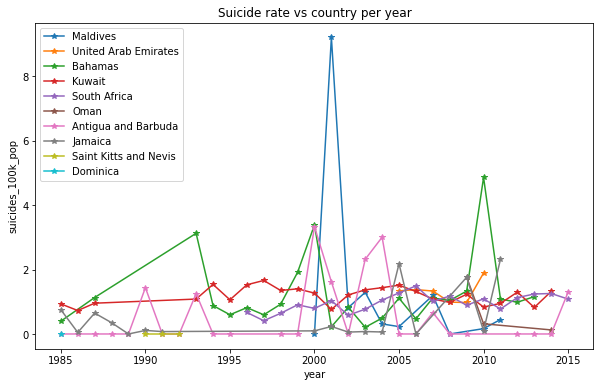

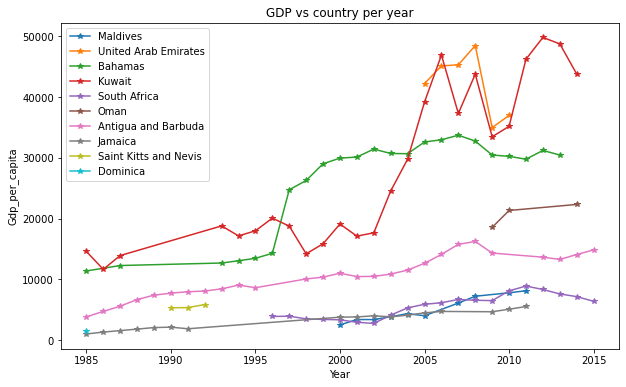

In [22]:
plt.figure(figsize = (10,6))
df_sui = df.groupby(["country","year"]).suicides_100k_pop.mean()
for country in sorted_countries[-10:]:
    plt.plot(df_sui[country].index,df_sui[country].values, label=country, marker="*")
plt.xlabel("year")
plt.ylabel("suicides_100k_pop")
plt.title("Suicide rate vs country per year")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
for country in sorted_countries[-10:]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("Gdp_per_capita")
plt.title("GDP vs country per year")
plt.legend()
plt.show()

On the one hand, Kuwait demostrates permament growth of GDP from 15000 to max around 50000 while the suicide level is stable (very low). On the other hand very poor Jamaica or South Africa whose GDP is around 5000 and suicide level very low as well. One can look more carefully at the GDP ranges and suicide levels bearing in mind that such different countries are on the bottom of suicide ratio table.

# **8. Suicides per country per year and HDI for year**

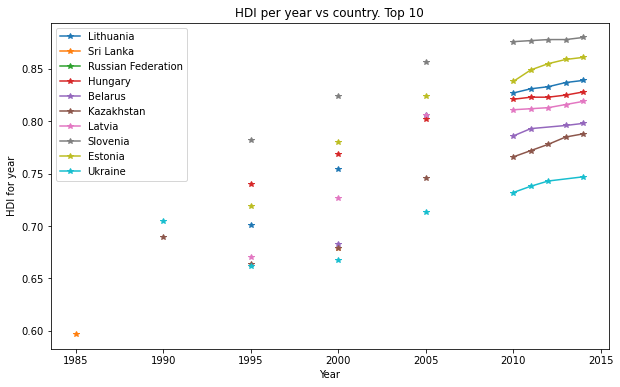

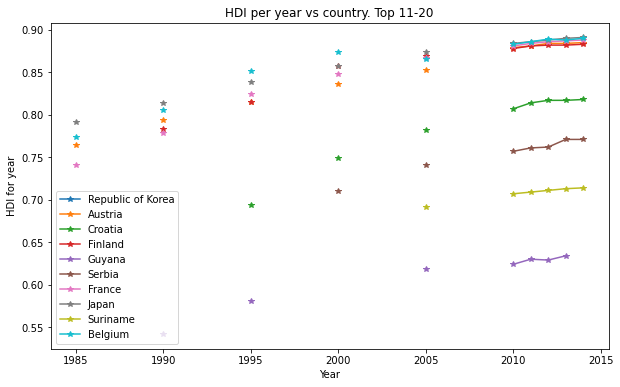

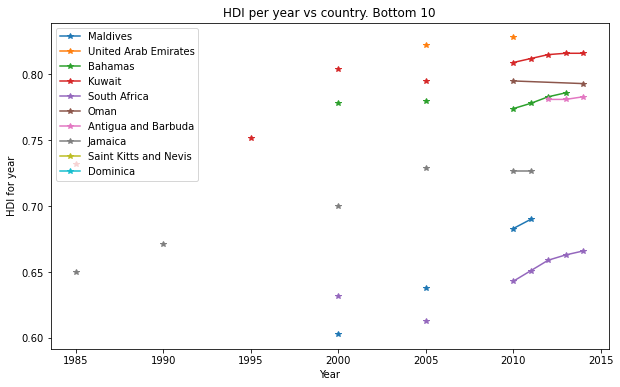

In [23]:
plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).HDI_for_year.mean()
for country in sorted_countries[:10]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("HDI for year")
plt.title("HDI per year vs country. Top 10")
plt.legend()
plt.show()

plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).HDI_for_year.mean()
for country in sorted_countries[10:20]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("HDI for year")
plt.title("HDI per year vs country. Top 11-20")
plt.legend()
plt.show()


plt.figure(figsize = (10,6))
df_gdp = df.groupby(["country","year"]).HDI_for_year.mean()
for country in sorted_countries[-10:]:
    plt.plot(df_gdp[country].index,df_gdp[country].values, label=country, marker="*")
plt.xlabel("Year")
plt.ylabel("HDI for year")
plt.title("HDI per year vs country. Bottom 10")
plt.legend()
plt.show()

Obviously, there is not enough data to be confident since 70% of data is missing, but we can see some patterns that can correlate with GDP. Predictive Power Score showed that GDP is a good predictor for HDI, and both of them are not predictors for suicides_no. 

In [24]:
df1 = pd.DataFrame({"country_list": country_list, "country_suicide_ratio": country_suicide_ratio})
new_index = (df1["country_suicide_ratio"].sort_values(ascending=False)).index.values
sorted_data = df1.reindex(new_index)
sorted_data2 = sorted_data.drop(sorted_data.tail(42).index)
country_list_new = list(sorted_data2["country_list"])

kids = []
young = []
adult = []
pensioner = []
old = []
for i in country_list_new:
    x = df[df["country"] == i]
    ki = x[x['age']== '05-14 years']
    yo = x[x['age']=='15-24 years']
    ad = x[x['age']=='35-54 years']
    pe = x[x['age']=='55-74 years']
    ol = x[x['age']== '75+ years']
    z = sum(x.suicides_no)
    kids.append((sum (ki.suicides_no))*100/ z)
    young.append((sum (yo.suicides_no))*100/ z)
    adult.append((sum (ad.suicides_no))*100/ z)
    pensioner.append((sum (pe.suicides_no))*100/ z)
    old.append((sum (ol.suicides_no))*100/ z)

# **9. Age distribution and Countries**

[Text(0.5, 0, 'Percentage of Age'),
 Text(0, 0.5, '50 Countries with the Highest Suicide Rates'),
 Text(0.5, 1.0, "Percentage of Countries's Suicides According to Age: Kids and Young people")]

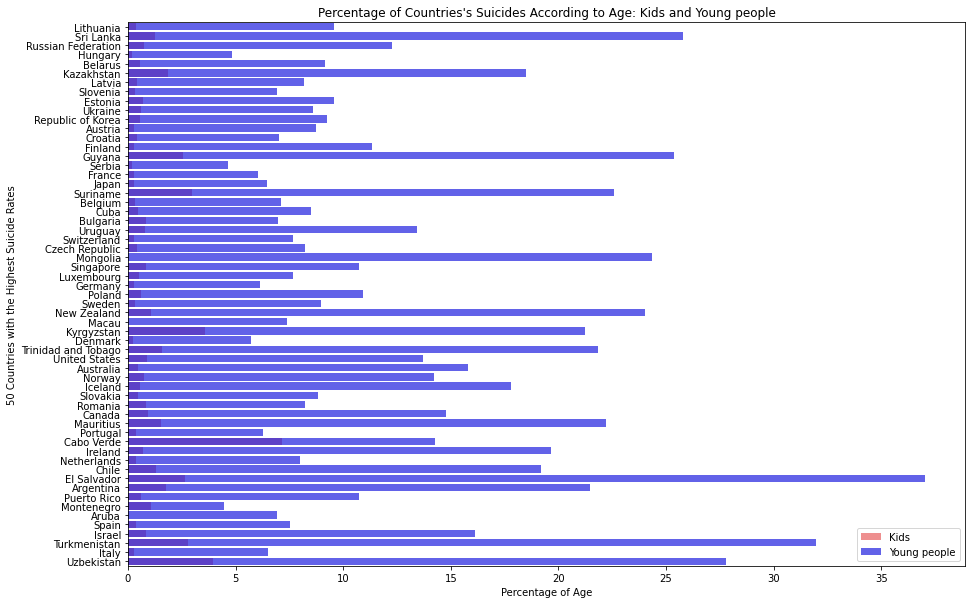

In [25]:
f,ax = plt.subplots(figsize = (15,10))
sns.barplot(x=kids,y=country_list_new,color='red',alpha = 0.5,label='Kids' )
sns.barplot(x=young,y=country_list_new,color='blue',alpha = 0.7,label='Young people')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Age', ylabel='50 Countries with the Highest Suicide Rates',
       title = "Percentage of Countries's Suicides According to Age: Kids and Young people")

[Text(0.5, 0, 'Percentage of Age'),
 Text(0, 0.5, '50 Countries with the Highest Suicide Rates'),
 Text(0.5, 1.0, "Percentage of Countries's Suicides According to Age: Adults and Pensioners")]

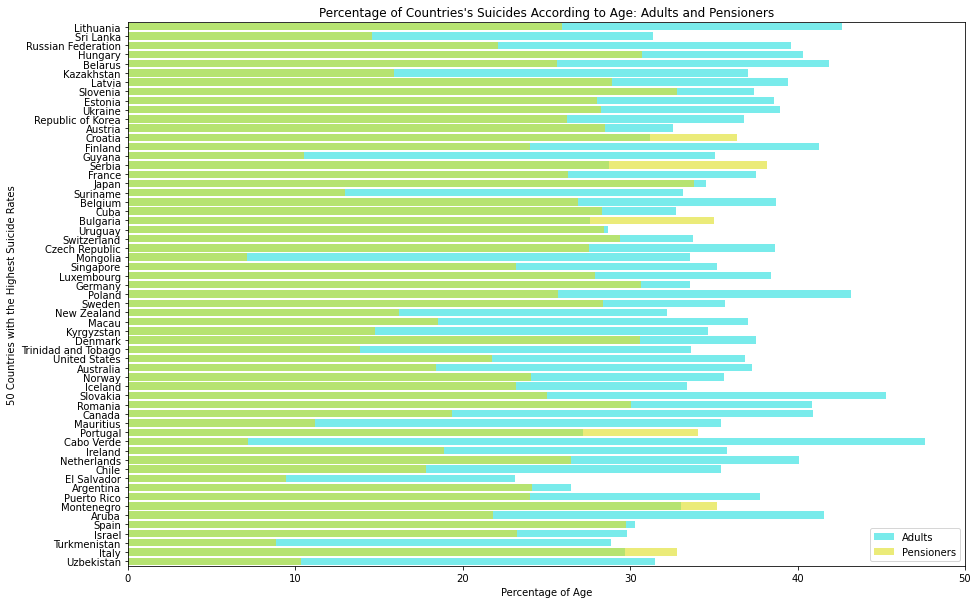

In [26]:
f,ax = plt.subplots(figsize = (15,10))
sns.barplot(x=adult,y=country_list_new,color='cyan',alpha = 0.6,label='Adults')
sns.barplot(x=pensioner,y=country_list_new,color='yellow',alpha = 0.6,label='Pensioners')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Age', ylabel='50 Countries with the Highest Suicide Rates',
       title = "Percentage of Countries's Suicides According to Age: Adults and Pensioners")

[Text(0.5, 0, 'Percentage of Age'),
 Text(0, 0.5, '50 Countries with the Highest Suicide Rates'),
 Text(0.5, 1.0, "Percentage of Countries's Suicides According to Age:Pensioners and Old people")]

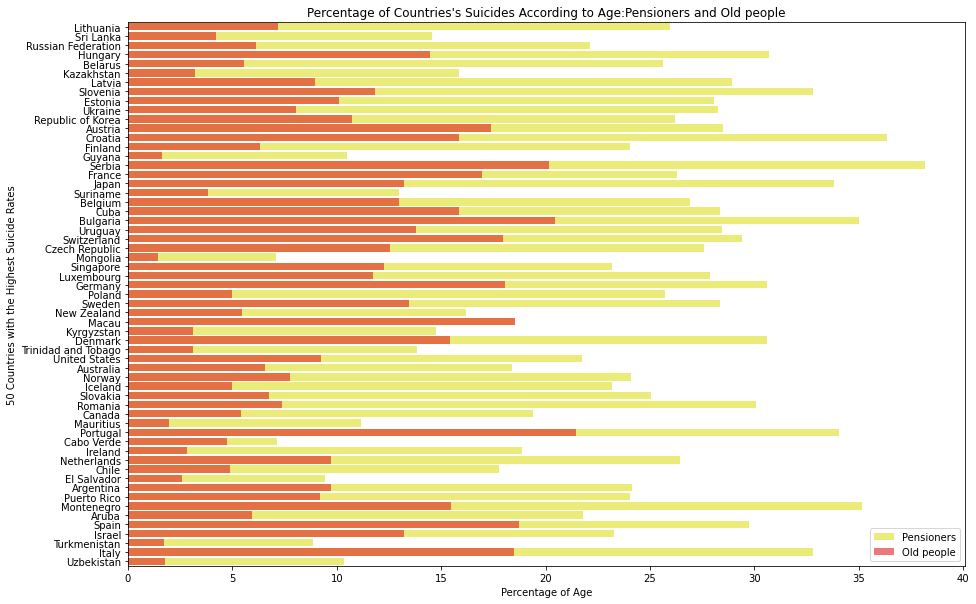

In [27]:
f,ax = plt.subplots(figsize = (15,10))
sns.barplot(x=pensioner,y=country_list_new,color='yellow',alpha = 0.6,label='Pensioners')
sns.barplot(x=old,y=country_list_new,color='red',alpha = 0.6,label='Old people')

ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Age', ylabel='50 Countries with the Highest Suicide Rates',
       title = "Percentage of Countries's Suicides According to Age:Pensioners and Old people")

In [28]:
def country_year_age(country):
    plt.figure(figsize = (8,6))
    sns.barplot(x="year", y="suicides_no", hue="age",
            ci = None,data = (df[df["country"] == country]) )
    plt.xticks(rotation = 90)
    plt.title("Suicide rate of "+ str(country))
    plt.legend()    
    plt.show()

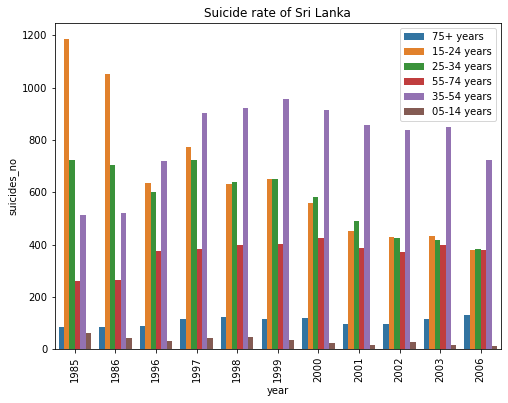

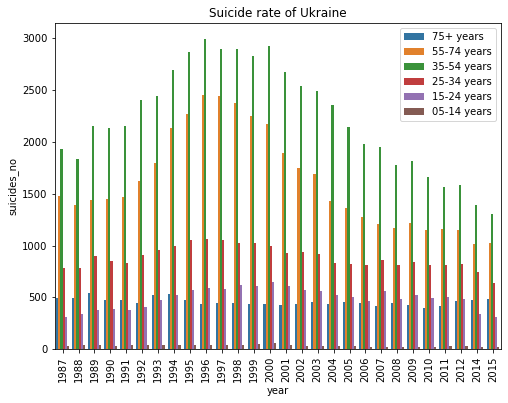

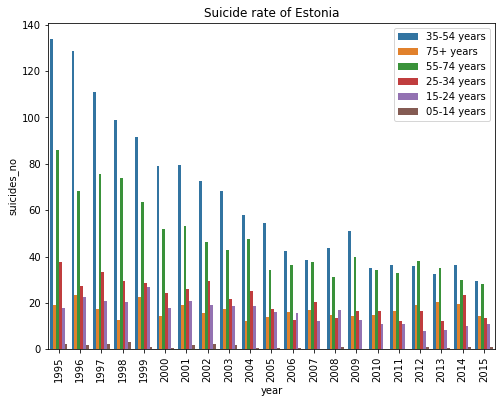

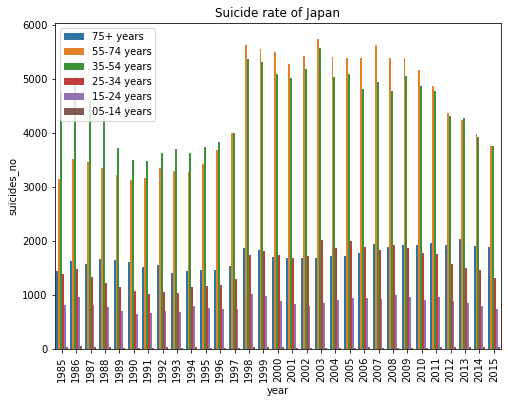

In [29]:
country_year_age('Sri Lanka')
country_year_age('Ukraine')
country_year_age('Estonia')
country_year_age('Japan')

# **Conclusions**
The most obvious thing is the suicide rate depends on countries and much less - on the age. Different countries show different age dictributions of suiciders, we saw that on the graphs of top 50 ountries. 
There is no correlation between GDP and suicide rate. It would be more reasonable to talk about shared values of some regions like Europe, where countries show similar tendencies. 

The dramatic growth of suicide numbers was in the end of 1980 - 1995 and most of the countries that took first places are former Soviet Union countries, so we can cnclude that the system collapse reflected on local societies and led to increasing of suicides. However, they demonstrate a trend of decreasing those numbers after year 1995.

Asian countries like Japan and Korea are showing dangerous trend - increasing suicide numbers in the last years.

African countries are very unstable, it's hard to predict how will suicide rate change in the next few years.

That is why the first graph of total suicide numbers demonstrates relative stability within 2000-2014 and another peak in 2015. New different challenges (like Internet and social networks) people face in some countries (and which lead to a suicide) compensate the decreasing of suicide level in other countries that have already dealt with their own challenges.